### Task 1: Data Exploration And Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\Dataset .csv")

In [3]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

In [5]:
missing_values = df.isnull().sum()
missing_values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [9]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()
rating_counts

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64

In [10]:
rating_percentage = (rating_counts / len(df)) * 100
rating_percentage

Aggregate rating
0.0    22.489792
1.8     0.010470
1.9     0.020940
2.0     0.073291
2.1     0.157052
2.2     0.282693
2.3     0.492095
2.4     0.910899
2.5     1.151712
2.6     1.999791
2.7     2.617527
2.8     3.298084
2.9     3.989111
3.0     4.900010
3.1     5.433986
3.2     5.465396
3.3     5.057062
3.4     5.214114
3.5     5.025652
3.6     4.795309
3.7     4.470736
3.8     4.188043
3.9     3.507486
4.0     2.785049
4.1     2.868810
4.2     2.313894
4.3     1.821799
4.4     1.507696
4.5     0.994660
4.6     0.816668
4.7     0.439745
4.8     0.261753
4.9     0.638677
Name: count, dtype: float64

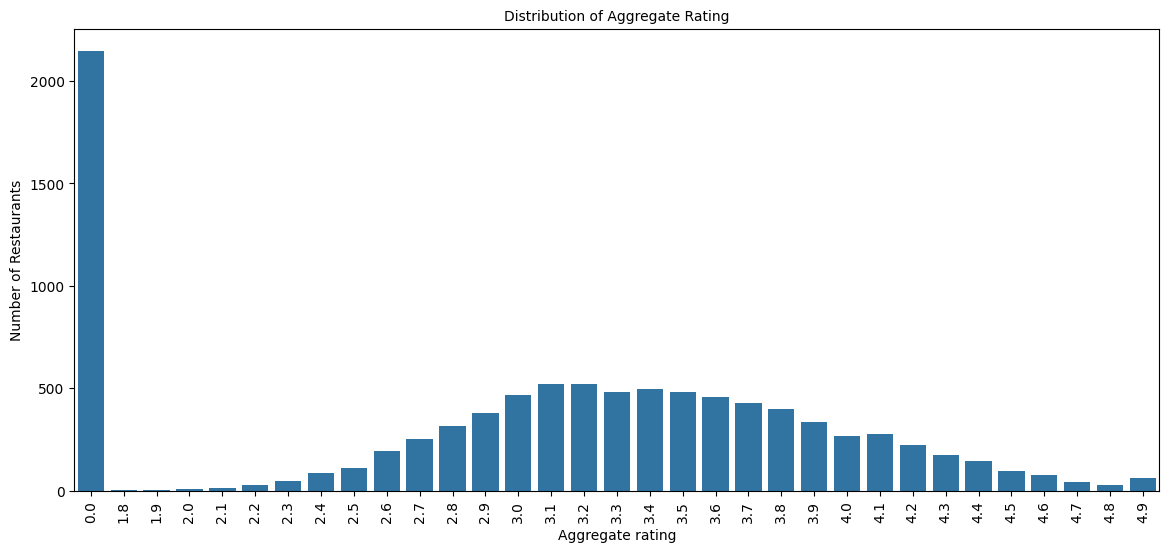

In [11]:
plt.figure(figsize=(14,6))
sns.countplot(x='Aggregate rating', data=df)
plt.title('Distribution of Aggregate Rating', fontsize=10)
plt.xlabel('Aggregate rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

In [12]:
Dominant_class = rating_counts.idxmax()
Dominant_count = rating_counts.max()

print(f"Most Doninant class: {Dominant_class}")
print(f"Count: {Dominant_count}")

Most Doninant class: 0.0
Count: 2148


In [13]:
df.shape

(9551, 21)

In [14]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Task 2: Descriptive Analysis

In [15]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
print("Numerical Coiumns:")
print(numerical_cols)

categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_cols)

Numerical Coiumns:
Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

Categorical Columns:
Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [16]:
numerical_table = df[numerical_cols].describe().T
numerical_table

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [17]:
# Country code Distribution

country_counts = df['Country Code'].value_counts()
country_counts.head(10)

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

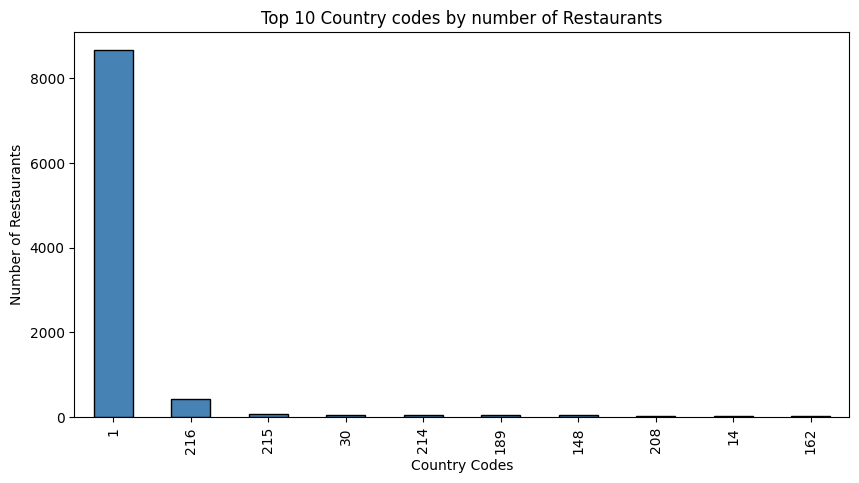

In [18]:
plt.figure(figsize=(10,5))
country_counts.head(10).plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Top 10 Country codes by number of Restaurants")
plt.xlabel("Country Codes")
plt.ylabel("Number of Restaurants")
plt.show()

In [19]:
# City Distribution

city_counts=df['City'].value_counts()
city_counts.head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

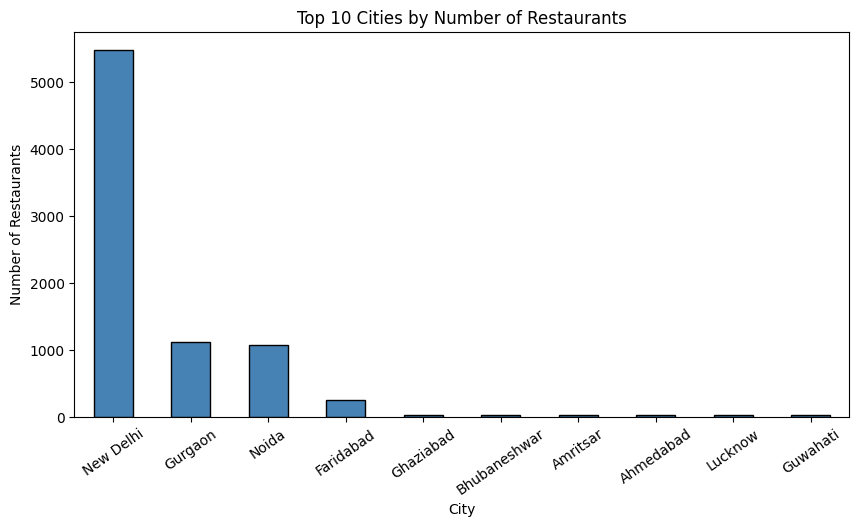

In [20]:
plt.figure(figsize=(10,5))
city_counts.head(10).plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=35)
plt.show()

In [21]:
# Cuisines Distribution

cuisine = df['Cuisines'].str.split(', ').explode()
cuisine_counts = cuisine.value_counts()
cuisine_counts.head(10)

Cuisines
North Indian    3969
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64

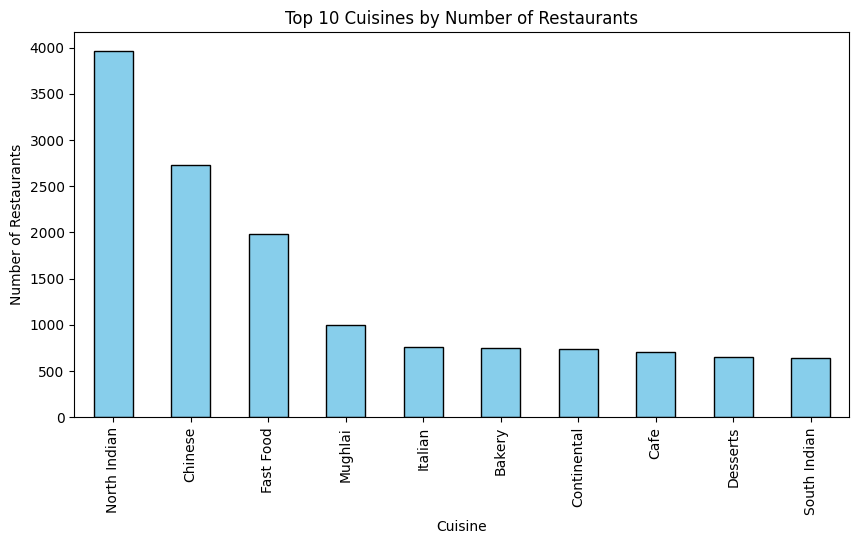

In [22]:
plt.figure(figsize=(10,5))
cuisine_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Cuisines by Number of Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.show()

In [23]:
# Top 10 Cities with Highest Number of Restaurants

top_cities = city_counts.head(10)
top_cities

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

In [24]:
# Top 10 Cuisines with Highest Number of Restaurants

top_cuisines = cuisine_counts.head(10)
top_cuisines

Cuisines
North Indian    3969
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64

### Task 3: Geospatial Analysis

In [25]:
df[['Latitude', 'Longitude', 'City', 'Country Code', 'Aggregate rating']].head()

,Latitude,Longitude,City,Country Code,Aggregate rating
0,14.565443,121.027535,Makati City,162,4.8
1,14.553708,121.014101,Makati City,162,4.5
2,14.581404,121.056831,Mandaluyong City,162,4.4
3,14.585318,121.056475,Mandaluyong City,162,4.9
4,14.584450,121.057508,Mandaluyong City,162,4.8


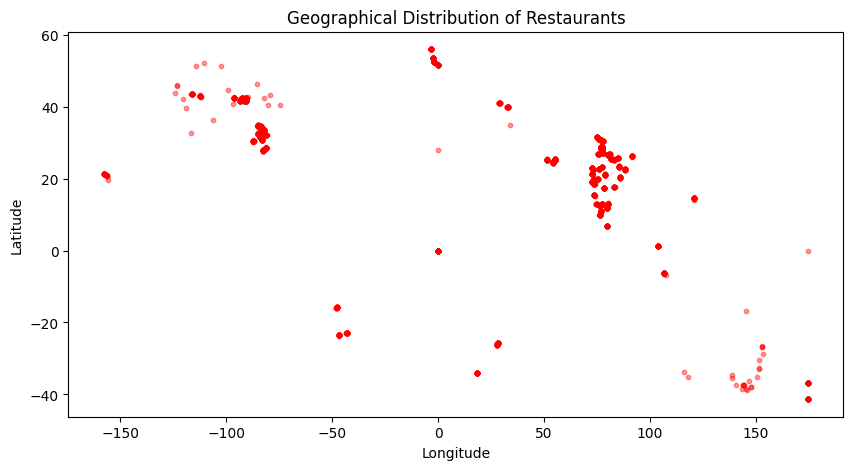

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(df['Longitude'], df['Latitude'], color='red', alpha=0.4, s=10)
plt.title("Geographical Distribution of Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [27]:
city_counts = df['City'].value_counts().head(10)
city_counts

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

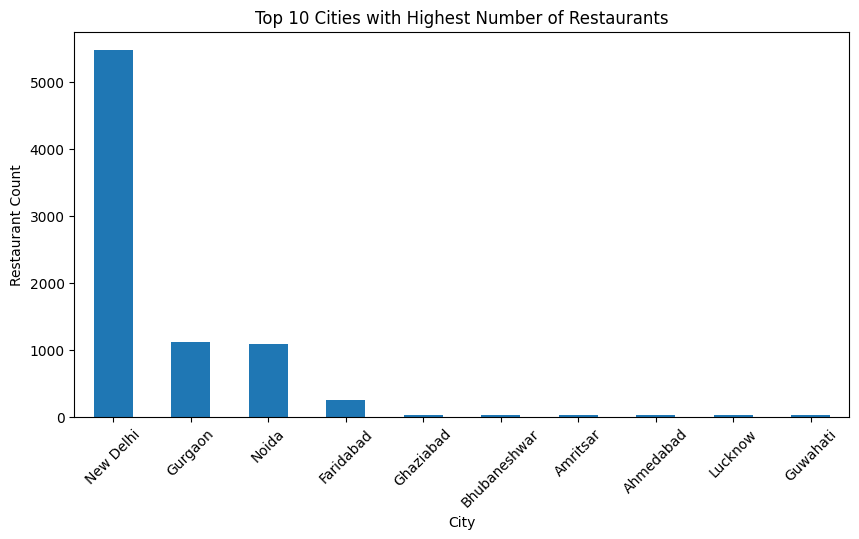

In [28]:
plt.figure(figsize=(10,5))
city_counts.plot(kind='bar')
plt.title("Top 10 Cities with Highest Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Restaurant Count")
plt.xticks(rotation=45)
plt.show()

In [29]:
country_counts = df['Country Code'].value_counts()
country_counts.head(10)

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

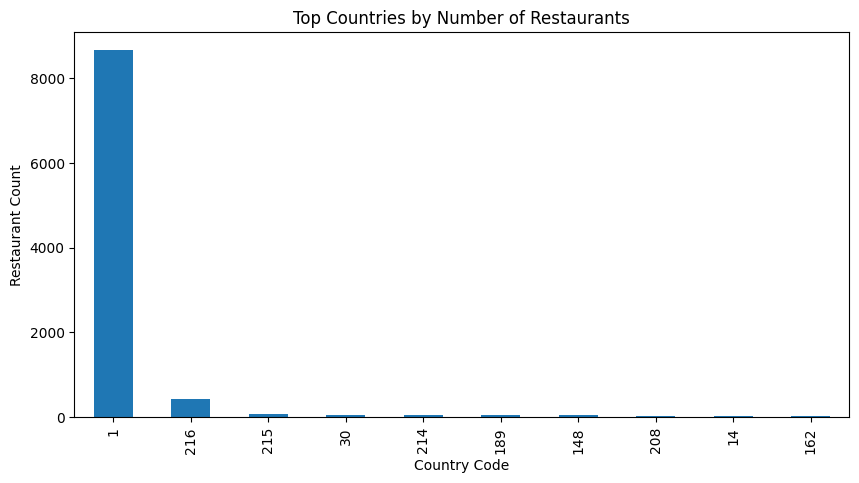

In [30]:
plt.figure(figsize=(10,5))
country_counts.head(10).plot(kind='bar')
plt.title("Top Countries by Number of Restaurants")
plt.xlabel("Country Code")
plt.ylabel("Restaurant Count")
plt.show()

In [31]:
location_rating_corr = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
location_rating_corr

,Latitude,Longitude,Aggregate rating
Latitude,1.000000,0.043207,0.000516
Longitude,0.043207,1.000000,-0.116818
Aggregate rating,0.000516,-0.116818,1.000000


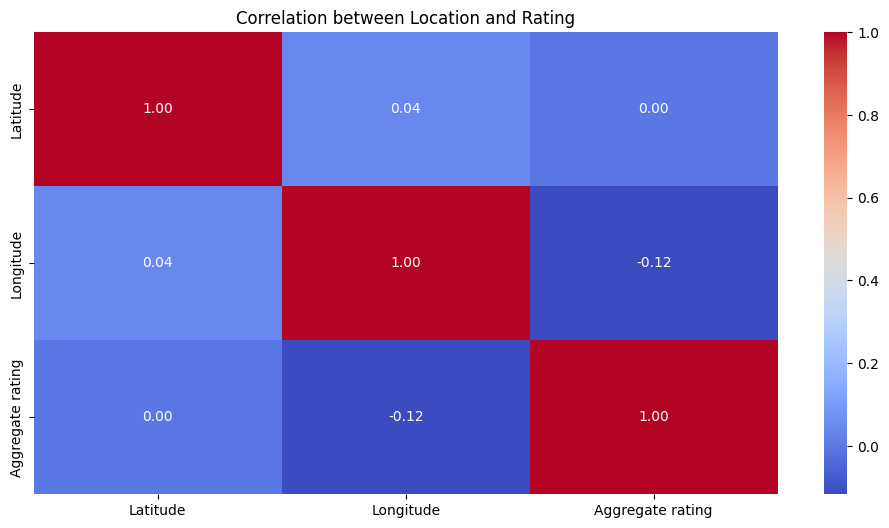

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(location_rating_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Location and Rating")
plt.show()

In [33]:
avg_city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
avg_city_rating.head(10)

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64

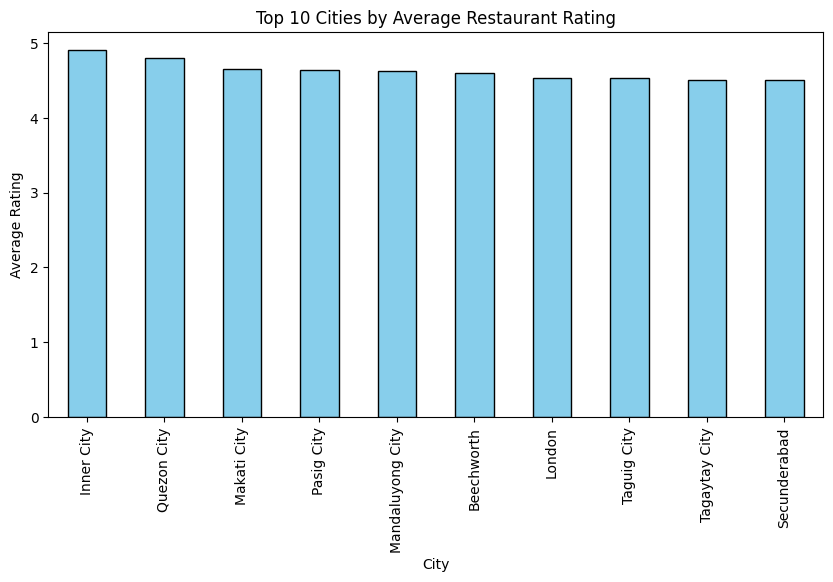

In [34]:
plt.figure(figsize=(10,5))
avg_city_rating.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()